In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'Train.csv')
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [5]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 20.4 MB


The dataset has no duplicate values


In [6]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 20.4 MB


the dataset has no null values

<AxesSubplot:>

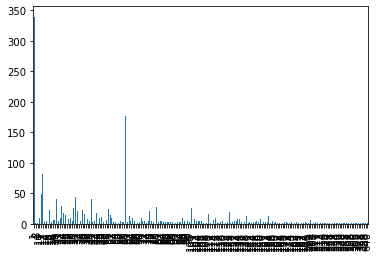

In [7]:
import seaborn as sns
data['feature_1'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

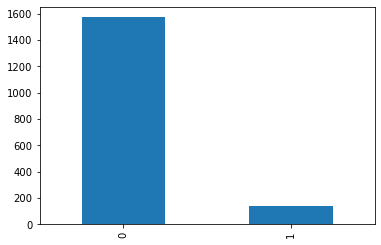

In [8]:
data['Class'].value_counts().sort_index().plot.bar()

selecting the highly correlated features


In [9]:
corr=data.corr()
corr

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
feature_1,1.000000,0.360987,-0.238039,-0.146451,-0.020594,-0.051018,-0.065750,-0.005955,-0.041431,0.005648,...,-0.036464,-0.045825,-0.013084,-0.017086,0.046419,-0.024247,-0.021814,-0.039176,-0.014291,0.001706
feature_2,0.360987,1.000000,0.515579,-0.002420,-0.036730,-0.053325,-0.048186,-0.010463,-0.040984,0.137668,...,-0.052713,-0.060369,0.033083,0.012136,-0.014087,0.200346,0.205776,0.057276,0.028134,0.333874
feature_3,-0.238039,0.515579,1.000000,0.123585,-0.026523,-0.018619,0.023457,-0.013497,-0.014082,0.087538,...,-0.031263,-0.028461,0.008639,-0.000334,-0.037159,0.089095,0.089823,0.021876,0.013210,0.130893
feature_4,-0.146451,-0.002420,0.123585,1.000000,0.033516,-0.014787,0.056232,0.025946,0.004212,0.070656,...,0.019257,0.026997,0.033516,-0.021591,0.039680,-0.005294,-0.008351,-0.003702,0.021179,0.022089
feature_5,-0.020594,-0.036730,-0.026523,0.033516,1.000000,-0.002924,-0.004906,-0.002264,-0.003702,-0.006164,...,-0.003462,-0.003928,-0.002924,-0.003462,-0.003462,-0.006839,-0.006709,-0.005411,-0.001848,-0.016309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_1555,-0.024247,0.200346,0.089095,-0.005294,-0.006839,-0.006839,-0.011474,-0.005294,-0.008658,0.068833,...,-0.008097,-0.009186,0.166918,-0.008097,-0.008097,1.000000,0.981016,0.507456,-0.004321,0.131289
feature_1556,-0.021814,0.205776,0.089823,-0.008351,-0.006709,-0.006709,-0.011256,-0.005194,-0.008494,0.028262,...,-0.007943,-0.009012,0.170306,-0.007943,-0.007943,0.981016,1.000000,0.517447,-0.004239,0.135190
feature_1557,-0.039176,0.057276,0.021876,-0.003702,-0.005411,-0.005411,-0.009078,-0.004189,-0.006850,0.040897,...,-0.006406,-0.007268,0.103756,-0.006406,-0.006406,0.507456,0.517447,1.000000,0.169037,0.076272
feature_1558,-0.014291,0.028134,0.013210,0.021179,-0.001848,-0.001848,-0.003100,-0.001430,-0.002339,0.147925,...,-0.002187,0.233979,-0.001848,-0.002187,-0.002187,-0.004321,-0.004239,0.169037,1.000000,-0.010306


In [10]:
cor_target = abs(corr["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.35]
relevant_features

feature_969     0.350439
feature_1048    0.363618
feature_1144    0.363471
feature_1154    0.367274
feature_1155    0.355898
feature_1199    0.355898
feature_1219    0.355898
feature_1244    0.396280
feature_1345    0.356310
feature_1400    0.423882
feature_1423    0.355898
feature_1425    0.355898
Class           1.000000
Name: Class, dtype: float64

creating a dataset using the highly correlated features

In [11]:
x=pd.concat([data['feature_969'],data['feature_1048'],data['feature_1144'],data['feature_1154'],data['feature_1155'],data['feature_1199'],data['feature_1219'],data['feature_1244'],data['feature_1345'],data['feature_1400'],data['feature_1423'],data['feature_1425']],axis=1)
y=data['Class']
x.head()

,feature_969,feature_1048,feature_1144,feature_1154,feature_1155,feature_1199,feature_1219,feature_1244,feature_1345,feature_1400,feature_1423,feature_1425
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


normalization of the features

In [12]:
for column in x.columns:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min()) 
x.head()

,feature_969,feature_1048,feature_1144,feature_1154,feature_1155,feature_1199,feature_1219,feature_1244,feature_1345,feature_1400,feature_1423,feature_1425
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


train test splitting

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(1372, 12).
training label shape is :(1372,).
testing data shape is :(343, 12).
testing label shape is :(343,).


1. SVM with rbf kernel

In [15]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf',gamma=8)
svc_model.fit(X_train, y_train)

SVC(gamma=8)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= svc_model .predict(X_test)
percentage=svc_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")
print(classification_report(y_test, predictions))

confusion matrix
[[313   1]
 [ 19  10]]
0.923469387755102
0.9416909620991254
Test set:343
Accuracy=94.16909620991254%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       314
           1       0.91      0.34      0.50        29

    accuracy                           0.94       343
   macro avg       0.93      0.67      0.73       343
weighted avg       0.94      0.94      0.93       343



2. xgboost

In [17]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
predictions= xgb_model .predict(X_test)
percentage=xgb_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")
print(classification_report(y_test, predictions))

confusion matrix
[[312   2]
 [ 18  11]]
0.923469387755102
0.9416909620991254
Test set:343
Accuracy=94.16909620991254%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       314
           1       0.85      0.38      0.52        29

    accuracy                           0.94       343
   macro avg       0.90      0.69      0.75       343
weighted avg       0.94      0.94      0.93       343



3.random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier()
forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
predictions= forest_model .predict(X_test)
percentage=forest_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(forest_model.score(X_train, y_train))
print(forest_model.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")
print(classification_report(y_test, predictions))

confusion matrix
[[313   1]
 [ 19  10]]
0.923469387755102
0.9416909620991254
Test set:343
Accuracy=94.16909620991254%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       314
           1       0.91      0.34      0.50        29

    accuracy                           0.94       343
   macro avg       0.93      0.67      0.73       343
weighted avg       0.94      0.94      0.93       343



In [ ]:
feature_969=float(input('enter the value for feature 969'))
feature_1048=float(input('enter the value for feature 1048'))
feature_1144=float(input('enter the value for feature 1144'))
feature_1154=float(input('enter the value for feature 1154'))
feature_1155=float(input('enter the value for feature 1155'))
feature_1199=float(input('enter the value for feature 1199'))
feature_1219=float(input('enter the value for feature 1219'))
feature_1244=float(input('enter the value for feature 1244'))
feature_1345=float(input('enter the value for feature 1345'))
feature_1400=float(input('enter the value for feature 1400'))
feature_1423 =float(input('enter the value for feature 1423'))
feature_1425=float(input('enter the value for feature 1425'))
inp=[[feature_969,feature_1048,feature_1144,feature_1154,feature_1155,feature_1199,feature_1219,feature_1244,feature_1345,feature_1400,feature_1423,feature_1425]]
out=svc_model.predict(inp)
if out<0.5:
    print('THE GIVEN WAFER IS IDENTIFIED AS :- faulty')
else:
    print('THE GIVEN WAFER IS IDENTIFIED AS :- normal')